# Preprocessing and Data Frame Generation for Malicious URLs Dataset

## 1) Necessary imports

**Run this command to install all nescessary packages**

pip install pandas matplotlib wordcloud tld

In [1]:
import pandas as pd
import re
from urllib.parse import urlparse
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tld import get_tld
import os.path

## 2) Load Dataset

In [2]:
#Read the dataset
df_urls = pd.read_csv('malicious_phish.csv')

In [3]:
# Display dataset shape and first few records
print(df_urls.shape)
df_urls.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [4]:
# Display value counts for 'type'
df_urls['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

## 3) Plotting Wordclouds

In [5]:
# Function to create word clouds for each type
def generate_wordcloud(text_data, title):
    wordcloud = WordCloud(
        width=1600, 
        height=800, 
        colormap='Paired'
    ).generate(text_data)
    
    plt.figure(figsize=(12, 14), facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=24, color='white')
    plt.tight_layout(pad=0)
    plt.show()

In [6]:
# Split dataset by type
df_phishing = df_urls[df_urls['type'] == 'phishing']
df_malware = df_urls[df_urls['type'] == 'malware']
df_defacement = df_urls[df_urls['type'] == 'defacement']
df_benign = df_urls[df_urls['type'] == 'benign']

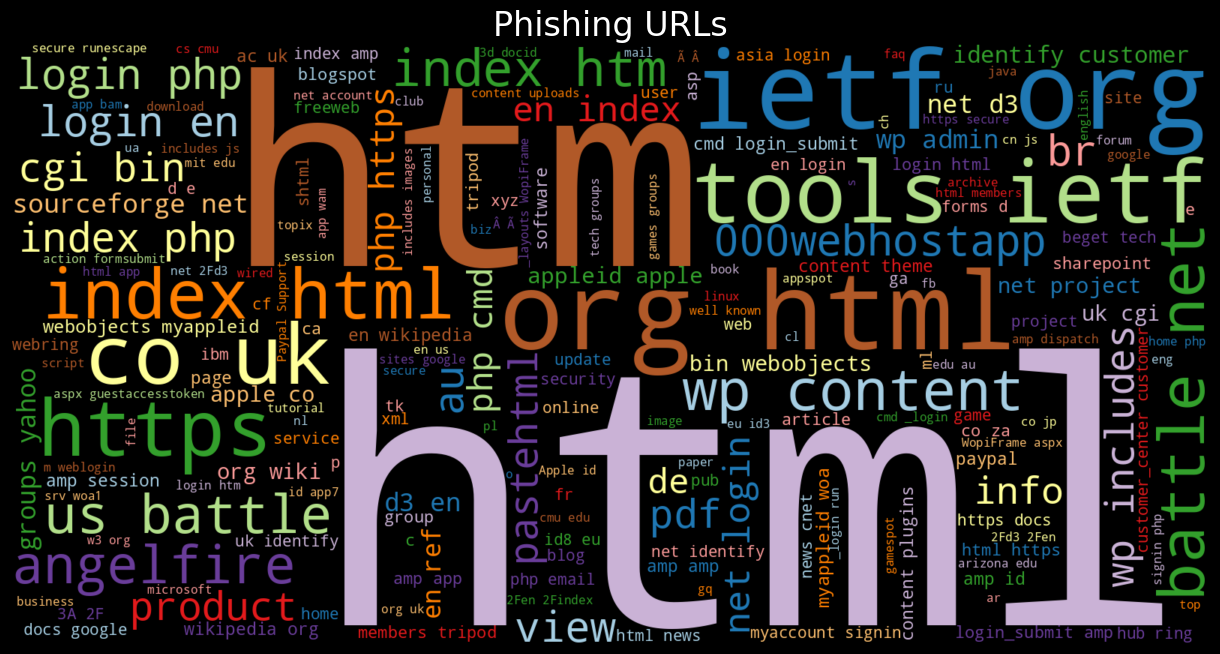

In [7]:
# Generate word clouds for each PHISHING type
generate_wordcloud(" ".join(df_phishing['url']), "Phishing URLs")

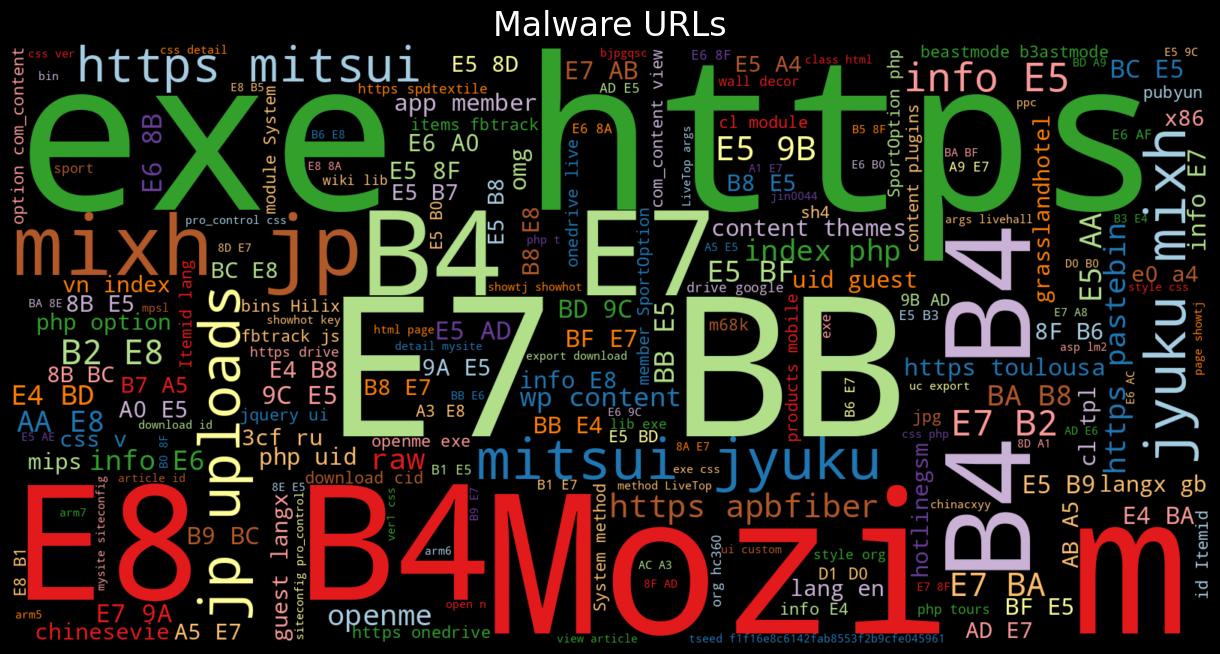

In [8]:
# Generate word clouds for MALWARE URL type
generate_wordcloud(" ".join(df_malware['url']), "Malware URLs")

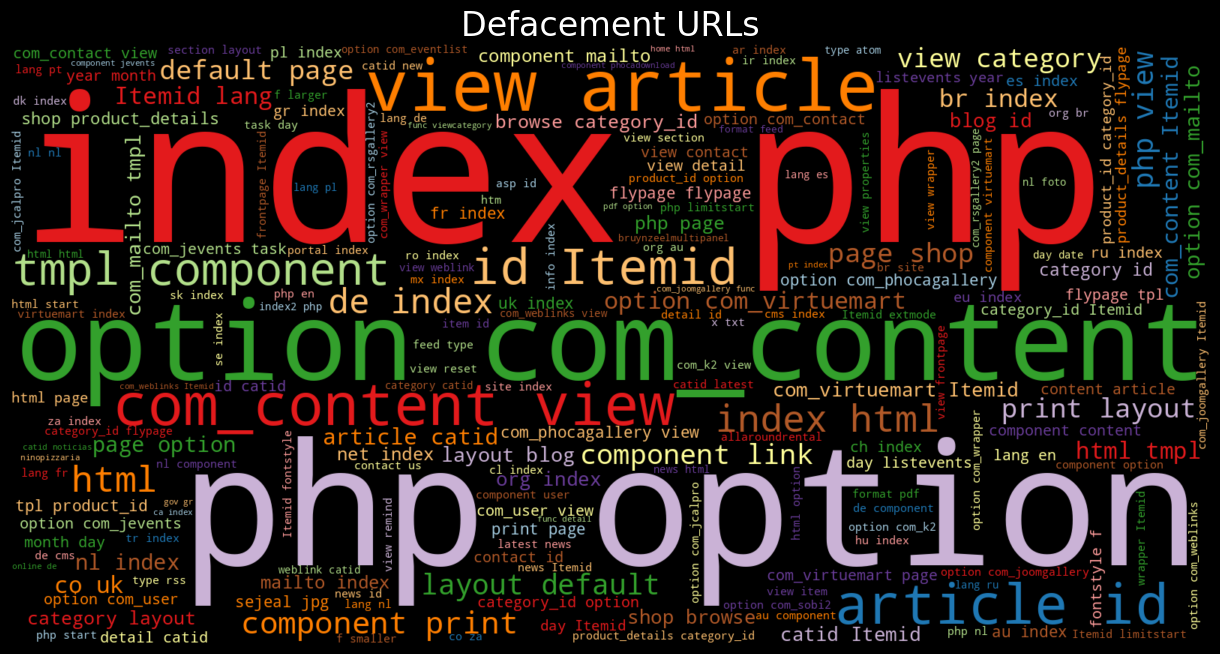

In [9]:
# Generate word clouds for each DEFACEMENT type
generate_wordcloud(" ".join(df_defacement['url']), "Defacement URLs")

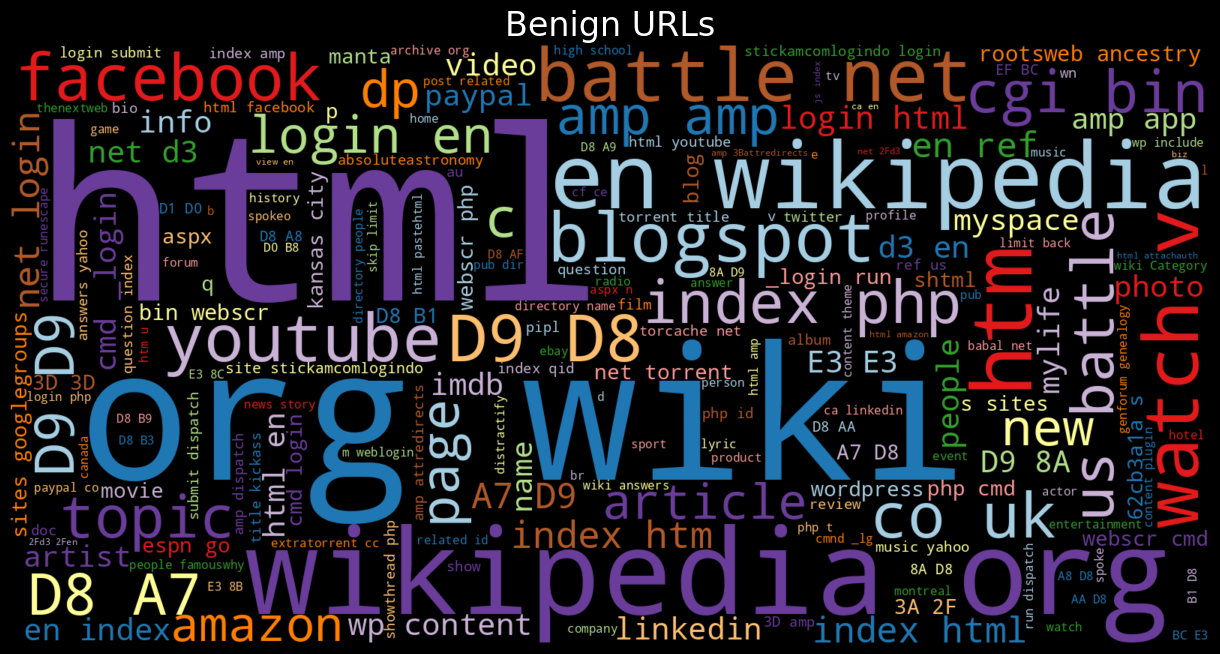

In [10]:
# Generate word clouds for each BENIGN type
generate_wordcloud(" ".join(df_benign['url']), "Benign URLs")

## 4) Feature Selection Engineering

In [11]:
# Check if URL contains an IP address
def has_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # IPv6
    return 1 if match else 0

df_urls['has_ip_address'] = df_urls['url'].apply(has_ip_address)

In [12]:
# Check if URL is abnormal
def is_abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    return 1 if match else 0

df_urls['is_abnormal_url'] = df_urls['url'].apply(is_abnormal_url)

In [13]:
# Check if URL has shortening service
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    return 1 if match else 0
    
df_urls['short_url'] = df_urls['url'].apply(lambda i: shortening_service(i))

In [14]:
# Count occurrences of a character in a URL
df_urls['dot_count'] = df_urls['url'].apply(lambda url: url.count('.'))
df_urls['www_count'] = df_urls['url'].apply(lambda url: url.count('www'))
df_urls['at_sign_count'] = df_urls['url'].apply(lambda url: url.count('@'))
df_urls['dir_count'] = df_urls['url'].apply(lambda url: urlparse(url).path.count('/'))
df_urls['embed_domain_count'] = df_urls['url'].apply(lambda url: urlparse(url).path.count('//'))
df_urls['https_count'] = df_urls['url'].apply(lambda url: url.count('https'))
df_urls['http_count'] = df_urls['url'].apply(lambda url: url.count('http'))
df_urls['percent_count'] = df_urls['url'].apply(lambda url: url.count('%'))
df_urls['question_mark_count'] = df_urls['url'].apply(lambda url: url.count('?'))
df_urls['hyphen_count'] = df_urls['url'].apply(lambda url: url.count('-'))
df_urls['equal_sign_count'] = df_urls['url'].apply(lambda url: url.count('='))

In [15]:
# Calculate URL length and hostname length
df_urls['url_length'] = df_urls['url'].apply(lambda url: len(url))
df_urls['hostname_length'] = df_urls['url'].apply(lambda url: len(urlparse(url).netloc))

In [16]:
# Check for suspicious words in URL
def contains_suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr', url)
    return 1 if match else 0

df_urls['has_suspicious_words'] = df_urls['url'].apply(contains_suspicious_words)

In [17]:
# Count the number of digits and letters in URL
df_urls['digit_count'] = df_urls['url'].apply(lambda url: sum(c.isdigit() for c in url))
df_urls['letter_count'] = df_urls['url'].apply(lambda url: sum(c.isalpha() for c in url))

In [18]:
# Calculate the length of the first directory in the URL
def first_directory_length(url):
    url_path = urlparse(url).path
    return len(url_path.split('/')[1]) if len(url_path.split('/')) > 1 else 0

df_urls['first_dir_length'] = df_urls['url'].apply(first_directory_length)

In [19]:
# Calculate the length of the top-level domain (TLD)
def tld_length(tld):
    return len(tld) if tld else -1

df_urls['tld'] = df_urls['url'].apply(lambda url: get_tld(url, fail_silently=True))

df_urls['tld_length'] = df_urls['tld'].apply(tld_length)
df_urls = df_urls.drop(columns=["tld"])

In [20]:
# Display final columns and value counts
df_urls.columns
df_urls['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

## 5) Saving the Processed Dataset

In [21]:
# Save the final DataFrame to a CSV file
df_urls.to_csv('processed_urls.csv', index=False)